# When Food meets Machine Learning: Food Image Classification Project using Convolutional Neural Networks in Keras

In this project, I want to merge two of my biggest passions I have: **Food** and **Machine Learning**. The result is a Food Classification System based on **Deep Neural Networks**, more specific on Convolutional Neural Networks, in order to classify food images.

The data I used come from the tensorflow dataset **"Food101"**, containing **101 classes** of food, each one with **1000 images each**. In this exercise, I will focus on three categories of food, representing my favourite dishes, which are: **Pizza**, **Risotto** and **Pasta alla Carbonara**.

The approach of this exercise is incremental. First, I will build and train a **Neural Network from scratch**, assessing its performance. Then I will add some **regularisation techniques**, in order to try to increase the performance of the model. Finally, I will use an already trained model to perform **Transfer Learning**, consisting in the utilisation of an already trained model to be used as feature extractor, and fine tune some of its weights, in order to leverage the training done by others with many more data and computational power than me, in order to increase the classification accuracy of my model.

The code for this exercise comes from three notebooks of the Google Machine Learning Course about Convolutional Neural Networks.

Course: https://developers.google.com/machine-learning/practica/image-classification

Notebooks:

https://colab.research.google.com/github/google/eng-edu/blob/main/ml/pc/exercises/image_classification_part1.ipynb?utm_source=practicum-IC&utm_campaign=colab-external&utm_medium=referral&hl=en&utm_content=imageexercise1-colab

https://colab.research.google.com/github/google/eng-edu/blob/main/ml/pc/exercises/image_classification_part2.ipynb?utm_source=practicum-IC&utm_campaign=colab-external&utm_medium=referral&hl=en&utm_content=imageexercise2-colab

https://colab.research.google.com/github/google/eng-edu/blob/main/ml/pc/exercises/image_classification_part3.ipynb?utm_source=practicum-IC&utm_campaign=colab-external&utm_medium=referral&hl=en&utm_content=imageexercise3-colab

# Data Loading and Preparation

## Data Loading

As said before, the dataset used for this analysis contains 101 types of different foods, and each food type has 1000 images. For the scope of this project, I focused my attention of three of my favourite and characteristic foods of the Italian Cousine, which are: Pizza, Risotto and Pasta alla Carbonara.

Dataset Link: https://www.tensorflow.org/datasets/catalog/food101

In [ ]:
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

Herw we are going to load the dataset into our environment.

In [ ]:
ds = tfds.load('food101', split='train', shuffle_files=True)

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteWEXZBE/food101-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteWEXZBE/food101-validation.tfrecord


Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


## Train-Validation Split

In the following cells, we are going to create some folders in the Colab environment in order to split the images loaded in **train** and validation sets, for each one of the selected classes.

In [ ]:
import os
import shutil

In [ ]:
%pwd

'/content'

In [ ]:
%cd ..

/


In [ ]:
%cd /root/tensorflow_datasets/downloads/extracted/TAR_GZ.data.vision.ee.ethz.ch_cvl_food-101ySzkoooKID8NlHHVljthH7dFjfXyynkttKL0IdIi3f4.tar.gz/food-101/images

/root/tensorflow_datasets/downloads/extracted/TAR_GZ.data.vision.ee.ethz.ch_cvl_food-101ySzkoooKID8NlHHVljthH7dFjfXyynkttKL0IdIi3f4.tar.gz/food-101/images


In [ ]:
%ls

apple_pie/           eggs_benedict/            onion_rings/
baby_back_ribs/      escargots/                oysters/
baklava/             falafel/                  pad_thai/
beef_carpaccio/      filet_mignon/             paella/
beef_tartare/        fish_and_chips/           pancakes/
beet_salad/          foie_gras/                panna_cotta/
beignets/            french_fries/             peking_duck/
bibimbap/            french_onion_soup/        pho/
bread_pudding/       french_toast/             pizza/
breakfast_burrito/   fried_calamari/           pork_chop/
bruschetta/          fried_rice/               poutine/
caesar_salad/        frozen_yogurt/            prime_rib/
cannoli/             garlic_bread/             pulled_pork_sandwich/
caprese_salad/       gnocchi/                  ramen/
carrot_cake/         greek_salad/              ravioli/
ceviche/             grilled_cheese_sandwich/  red_velvet_cake/
cheesecake/          grilled_salmon/           risotto/
cheese_plate/     

In [ ]:
%pwd

'/root/tensorflow_datasets/downloads/extracted/TAR_GZ.data.vision.ee.ethz.ch_cvl_food-101ySzkoooKID8NlHHVljthH7dFjfXyynkttKL0IdIi3f4.tar.gz/food-101/images'

In [ ]:
%mkdir train
%mkdir val

In [ ]:
%cd train
%mkdir train_pizza
%mkdir train_risotto
%mkdir train_carbonara

/root/tensorflow_datasets/downloads/extracted/TAR_GZ.data.vision.ee.ethz.ch_cvl_food-101ySzkoooKID8NlHHVljthH7dFjfXyynkttKL0IdIi3f4.tar.gz/food-101/images/train


In [ ]:
%ls

train_carbonara/  train_pizza/  train_risotto/


In [ ]:
%cd ..
%cd val
%mkdir val_pizza
%mkdir val_risotto
%mkdir val_carbonara

/root/tensorflow_datasets/downloads/extracted/TAR_GZ.data.vision.ee.ethz.ch_cvl_food-101ySzkoooKID8NlHHVljthH7dFjfXyynkttKL0IdIi3f4.tar.gz/food-101/images
/root/tensorflow_datasets/downloads/extracted/TAR_GZ.data.vision.ee.ethz.ch_cvl_food-101ySzkoooKID8NlHHVljthH7dFjfXyynkttKL0IdIi3f4.tar.gz/food-101/images/val


In [ ]:
%ls

val_carbonara/  val_pizza/  val_risotto/


In the following cells, we are going to define some python variables that are containing the folder paths of the folders that will contain our train and validation images. We will use these variables to divide the images into train and validation and, later, to input the data in our Neural Network.

In [ ]:
base_dir = '/root/tensorflow_datasets/downloads/extracted/TAR_GZ.data.vision.ee.ethz.ch_cvl_food-101ySzkoooKID8NlHHVljthH7dFjfXyynkttKL0IdIi3f4.tar.gz/food-101/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

# Directory with our training pizza pictures
train_pizza_dir = os.path.join(train_dir, 'train_pizza')

# Directory with our training risotto pictures
train_risotto_dir = os.path.join(train_dir, 'train_risotto')

# Directory with our training risotto pictures
train_carbonara_dir = os.path.join(train_dir, 'train_carbonara')

# Directory with our validation pizza pictures
validation_pizza_dir = os.path.join(validation_dir, 'val_pizza')

# Directory with our validation risotto pictures
validation_risotto_dir = os.path.join(validation_dir, 'val_risotto')

# Directory with our validation carbonara pictures
validation_carbonara_dir = os.path.join(validation_dir, 'val_carbonara')

Here we divide between train and validation the images related to the Pizza category.

In [ ]:
pizza_dir = os.path.join(base_dir, 'pizza')

In [ ]:
pizza_list_train = os.listdir(pizza_dir)

In [ ]:
count = 0
for i in pizza_list_train:
  if count < 750:
    #print(str(i))
    shutil.move(os.path.join(pizza_dir, i), os.path.join(train_pizza_dir, i))
  else:
    break
  count += 1


In [ ]:
len(os.listdir(train_pizza_dir))

750

In [ ]:
len(os.listdir(pizza_dir))

250

In [ ]:
pizza_list_val = os.listdir(pizza_dir)

In [ ]:
for i in pizza_list_val:
  shutil.move(os.path.join(pizza_dir, i), os.path.join(validation_pizza_dir, i))

In [ ]:
len(os.listdir(validation_pizza_dir))

250

In [ ]:
len(os.listdir(pizza_dir))

0

Here we divide between train and validation the images related to the Risotto category.

In [ ]:
risotto_dir = os.path.join(base_dir, 'risotto')

In [ ]:
risotto_list_train = os.listdir(risotto_dir)

In [ ]:
count = 0
for i in risotto_list_train:
  if count < 750:
    shutil.move(os.path.join(risotto_dir, i), os.path.join(train_risotto_dir, i))
  else:
    break
  count += 1

In [ ]:
len(os.listdir(train_risotto_dir))

750

In [ ]:
len(os.listdir(risotto_dir))

250

In [ ]:
risotto_list_val = os.listdir(risotto_dir)

In [ ]:
for i in risotto_list_val:
    shutil.move(os.path.join(risotto_dir, i), os.path.join(validation_risotto_dir, i))

In [ ]:
len(os.listdir(validation_risotto_dir))

250

In [ ]:
len(os.listdir(risotto_dir))

0

Here we divide between train and validation the images related to the Carbonara category.

In [ ]:
carbonara_dir = os.path.join(base_dir, 'spaghetti_carbonara')

In [ ]:
carbonara_list_train = os.listdir(carbonara_dir)

In [ ]:
count = 0
for i in carbonara_list_train:
  if count < 750:
    shutil.move(os.path.join(carbonara_dir, i), os.path.join(train_carbonara_dir, i))
  else:
    break
  count += 1

In [ ]:
len(os.listdir(train_carbonara_dir))

750

In [ ]:
len(os.listdir(carbonara_dir))

250

In [ ]:
carbonara_list_val = os.listdir(carbonara_dir)

In [ ]:
for i in carbonara_list_val:
  shutil.move(os.path.join(carbonara_dir, i), os.path.join(validation_carbonara_dir, i))


In [ ]:
len(os.listdir(validation_carbonara_dir))

250

In [ ]:
len(os.listdir(carbonara_dir))

0

In the following cells, we are going to show some example images present in our dataset.

In [ ]:
train_pizza_fnames = os.listdir(train_pizza_dir)
print(train_pizza_fnames[:10])

train_risotto_fnames = os.listdir(train_risotto_dir)
print(train_risotto_fnames[:10])

train_carbonara_fnames = os.listdir(train_carbonara_dir)
print(train_carbonara_fnames[:10])

['2250611.jpg', '3712344.jpg', '3793314.jpg', '129666.jpg', '3778801.jpg', '2014717.jpg', '77677.jpg', '898119.jpg', '248199.jpg', '3724187.jpg']
['2485187.jpg', '713463.jpg', '2865792.jpg', '3625852.jpg', '3269638.jpg', '966966.jpg', '1369963.jpg', '1774897.jpg', '3508404.jpg', '627383.jpg']
['2404222.jpg', '3188413.jpg', '3649553.jpg', '1432143.jpg', '3419560.jpg', '2608607.jpg', '980577.jpg', '221557.jpg', '1766704.jpg', '1916616.jpg']


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

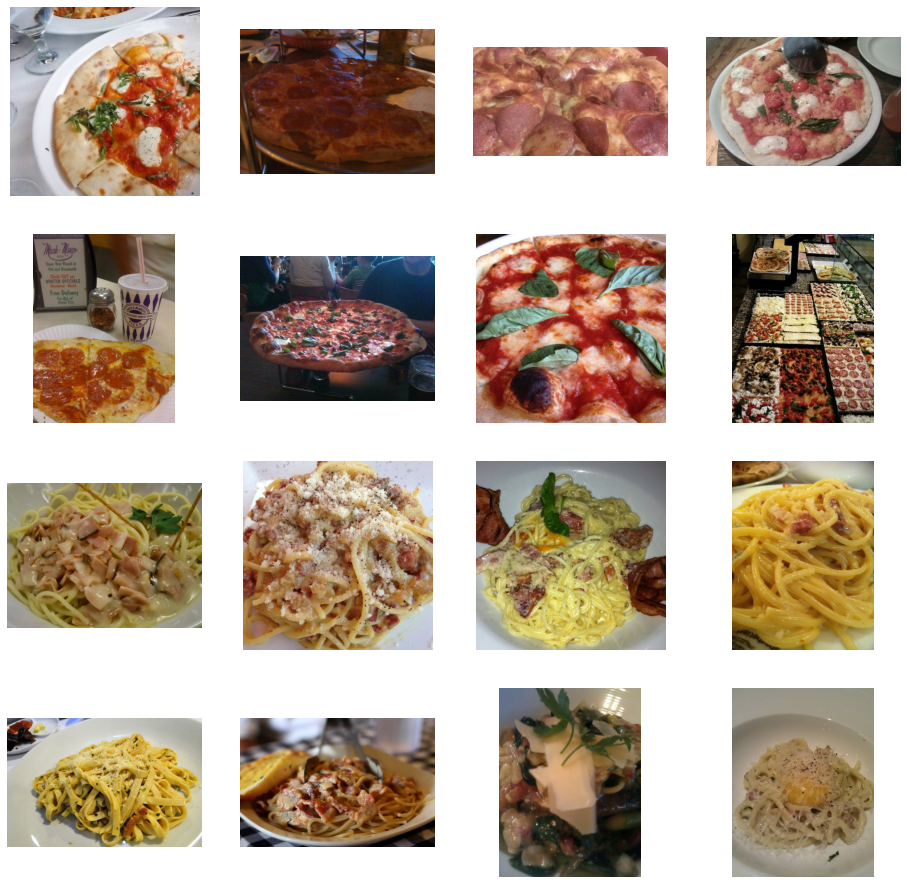

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_pizza_pix = [os.path.join(train_pizza_dir, fname) 
                for fname in train_pizza_fnames[pic_index-8:pic_index]]

next_carbonara_pix = [os.path.join(train_carbonara_dir, fname) 
                for fname in train_carbonara_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_pizza_pix+next_carbonara_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

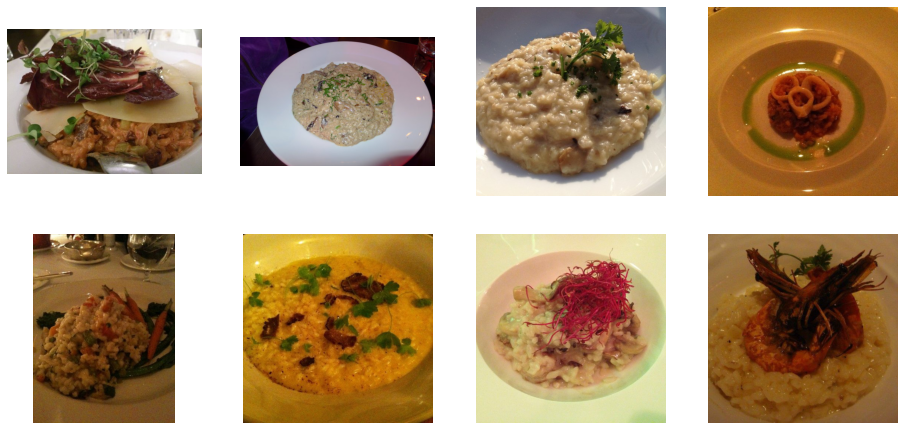

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

next_risotto_pix = [os.path.join(train_risotto_dir, fname) 
                for fname in train_risotto_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_risotto_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Model 1: Convolutional Neural Network trained from scratch

## Model Creation

As we said in the introduction, we are going to start building the first model, training it with the data we have available. The architecture chosen is the following:

   - First Conv Layer: **16** filters of **3X3** size, using **ReLU** activation function, and a **MaxPooling** layer with 2X2 window
   - Second Conv Layer: **32** filters of **3X3** size, using **ReLU** activation function, and a **MaxPooling** layer with 2X2 window
   - Third Conv Layer: **64** filters of **3X3** size, using **ReLU** activation function, and a **MaxPooling** layer with 2X2 window
   - **Flatten Layer** that creates a **1 dimensional vector**, which is the input of the classification layers
   - **Fully Connected Dense Layer** with 512 units and ReLU activation function
   - **Output Layer** with 3 units (one for each class) and **Softmax** activation function (to normalise the output to 1)

This configuration is widely used and it is know to perform good for image classification tasks. In addition, given the limited amount of images available in our dataset, it is preferable to keep the structure of the network small, in order to avoid overfitting.

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512 , activation='relu')(x)

# Create output layer with a three nodes and softmax activation
output = layers.Dense(3, activation='softmax')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

Here we can see the **summary** of the model, with all the various layers and the **number of parameters** for each layer. Important to notice that, given that we have to train our model from scratch, all the parameters we have will be **trainable**.

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

Here we are going to define the **loss function**, the **optimiser** and the **evaluation metric** of our model. We are going to use the  **Categorical Crossentropy** because we have a multi-class classification problem. The optimisation function chosen is **RMSprop**, because it automatically adapt the learning rate during the training. Finally, we use accuracy as classification metric.

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

## Data Preprocessing

In this part, we are going to normalise the input data between 0 and 1, after having confirmed the min and max values of the pixels. In addition, we are going to set up data generators that will read pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network, with an input image size of 150x150 and batch size of 15 images. 

In [ ]:
%pwd
%ls
%cd val_carbonara/

val_carbonara/  val_pizza/  val_risotto/
/root/tensorflow_datasets/downloads/extracted/TAR_GZ.data.vision.ee.ethz.ch_cvl_food-101ySzkoooKID8NlHHVljthH7dFjfXyynkttKL0IdIi3f4.tar.gz/food-101/images/val/val_carbonara


In [ ]:
%ls

1003992.jpg  1599889.jpg  2182164.jpg  2670257.jpg  3075369.jpg  488811.jpg
1005482.jpg  1624030.jpg  2199275.jpg  2670298.jpg  3097829.jpg  49667.jpg
1022289.jpg  1628784.jpg  2227188.jpg  2672480.jpg  3111921.jpg  501277.jpg
1058150.jpg  1636557.jpg  2228065.jpg  268113.jpg   3136988.jpg  518011.jpg
1094002.jpg  1648863.jpg  2233017.jpg  2697674.jpg  3139962.jpg  524392.jpg
1106431.jpg  1653307.jpg  2272197.jpg  2718994.jpg  3148000.jpg  529484.jpg
1124356.jpg  1658260.jpg  2311764.jpg  2747635.jpg  3212285.jpg  538741.jpg
11270.jpg    1671632.jpg  2312541.jpg  2756117.jpg  3264154.jpg  576572.jpg
1144341.jpg  1679241.jpg  2327834.jpg  276485.jpg   3332087.jpg  581923.jpg
1170925.jpg  1701035.jpg  2342634.jpg  2770999.jpg  3356542.jpg  582254.jpg
1172916.jpg  1764534.jpg  2361840.jpg  2796656.jpg  3361611.jpg  587446.jpg
1187335.jpg  1765972.jpg  2370218.jpg  2800356.jpg  3368794.jpg  590995.jpg
119494.jpg   1766044.jpg  2382447.jpg  2810969.jpg  338113.jpg   591701.jpg
1198844.jpg  

In [ ]:
# example of pixel normalization to understand the values of our pixels
from numpy import asarray
from PIL import Image
# load image
image = Image.open('1005482.jpg')
pixels = asarray(image)
# confirm pixel range is 0-255
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: uint8
Min: 0.000, Max: 255.000


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 15 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=15,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# Flow validation images in batches of 15 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=15,
        class_mode='categorical')

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


## Training

In this part, we are finally training our model using the input data. We have defined **750 images** of each class for **training** purposes and **250 images** for **validation**. We will train the model for **30 epochs**. Additionally, we define the number of steps in each epoch for both training and validation, defined as number of images / batch size. So we define 150 steps for training (2250 / 15) and 50 for validation (750 / 15).

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=150,  # 2250 images = batch_size * steps
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,  # 750 images = batch_size * steps
      verbose=2)

Epoch 1/30
150/150 - 13s - loss: 1.0904 - acc: 0.4751 - val_loss: 0.9811 - val_acc: 0.5120
Epoch 2/30
150/150 - 12s - loss: 0.8905 - acc: 0.5889 - val_loss: 0.8450 - val_acc: 0.6253
Epoch 3/30
150/150 - 12s - loss: 0.7401 - acc: 0.6640 - val_loss: 0.7714 - val_acc: 0.6480
Epoch 4/30
150/150 - 12s - loss: 0.6215 - acc: 0.7316 - val_loss: 0.9285 - val_acc: 0.6413
Epoch 5/30
150/150 - 12s - loss: 0.4664 - acc: 0.7978 - val_loss: 0.8396 - val_acc: 0.6667
Epoch 6/30
150/150 - 12s - loss: 0.3418 - acc: 0.8738 - val_loss: 0.9446 - val_acc: 0.6533
Epoch 7/30
150/150 - 12s - loss: 0.2302 - acc: 0.9076 - val_loss: 1.1225 - val_acc: 0.6507
Epoch 8/30
150/150 - 12s - loss: 0.1417 - acc: 0.9431 - val_loss: 1.3306 - val_acc: 0.6787
Epoch 9/30
150/150 - 13s - loss: 0.1264 - acc: 0.9627 - val_loss: 1.4042 - val_acc: 0.6627
Epoch 10/30
150/150 - 12s - loss: 0.0915 - acc: 0.9729 - val_loss: 1.8904 - val_acc: 0.6373
Epoch 11/30
150/150 - 13s - loss: 0.0560 - acc: 0.9849 - val_loss: 2.2170 - val_acc: 0.65

## Evaluation of the results

Now we are going to visualise the results of our first model. As we can see, our model performs very well in the training metrics but very poorly on the validation ones, clear symptom of **overfitting**. In the next part, we are going to introduce some **regularisation techniques** in order to limit overfitting and improve the performance of our model.

Text(0.5, 1.0, 'Training and validation loss')

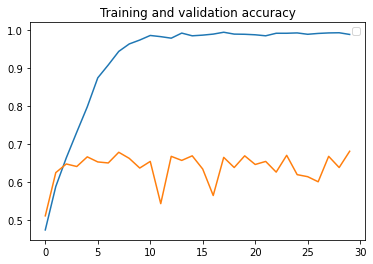

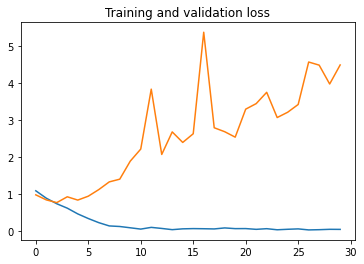

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.legend()
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

## Visualising Intermediate Representations

In the following lines of code, we are going to visualise the output of a sample image as it goes through the layers of our neural network, in order to understand the features tha the model is able to learn.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


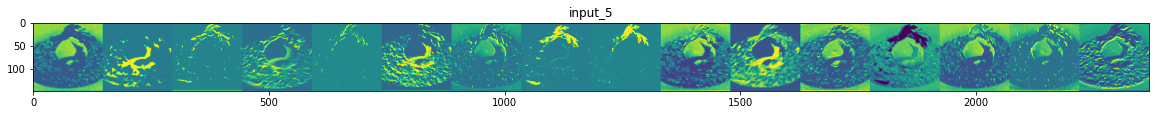

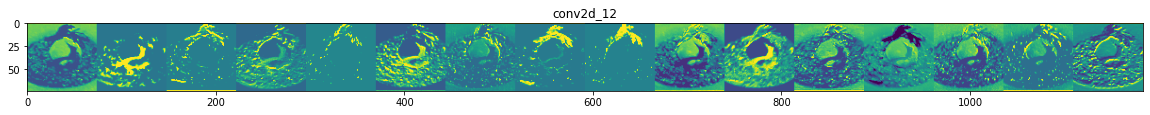

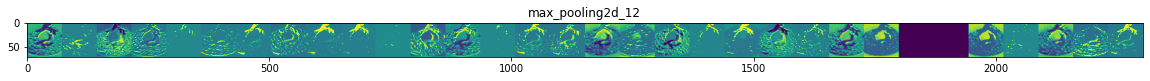

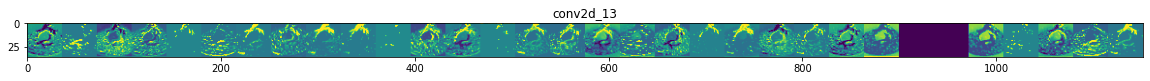

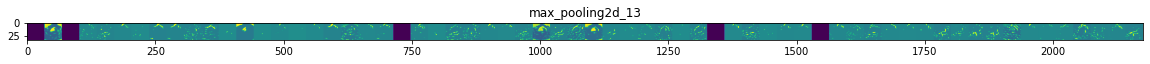

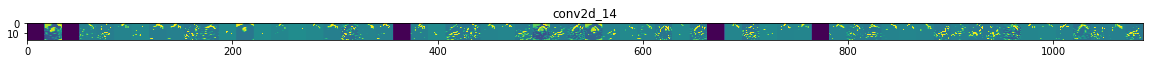

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
pizza_img_files = [os.path.join(train_pizza_dir, f) for f in train_pizza_fnames]
risotto_img_files = [os.path.join(train_risotto_dir, f) for f in train_risotto_fnames]
img_path = random.choice(pizza_img_files + risotto_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

As you can see we go from the raw pixels of the images to increasingly **abstract representations**. The representations downstream start highlighting what the network pays attention to, and they show fewer features being "activated".


These representations carry increasingly less information about the original pixels of the image, but increasingly **refined information about the class** of the image. You can think of a convnet (or a deep network in general) as an **information distillation pipeline**.

#Model 2: CNN with Drop-Out regularisation

In this part, we will create a CNN with the same structure as before, with the addition of a **Drop-Out Layer**. Drop_Out is a common regularisation technique used in Neural Networks, consisting in literally **drop** in every iteration of the Forward Pass anad Back Propagation a certain percentage of neurons of the Drop-Out Layer, in order to **spread the knowledge** of the network in as many units of the layer as possible, to **avoid overfitting**. In this example we will experiment with two different levels of Drop-Out, 0.3 and 0.7, in order to see the effect on the evaluation metrics.

## Data Preprocessing

We are going to keep the same data preprocessing as before.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=15,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=15,
        class_mode='categorical')

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


## Model Creation: Drop-Out = 0.3

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout layer with a dropout rate of 0.3
x = layers.Dropout(0.3)(x)
# Create output layer with three nodes and softmax activation
output = layers.Dense(3, activation='softmax')(x)

# Configure and compile the model
model_do_03 = Model(img_input, output)
model_do_03.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

### Training

In [ ]:
# put your code in this cell
history = model_do_03.fit(
      train_generator,
      steps_per_epoch=150,  # 2250 images = batch_size * steps --> 2000 = 20 * 100
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,  # 750 images = batch_size * steps --> 1000 = 20 * 50
      verbose=2)

Epoch 1/30
150/150 - 13s - loss: 1.1320 - acc: 0.4782 - val_loss: 0.8844 - val_acc: 0.5693
Epoch 2/30
150/150 - 13s - loss: 0.8918 - acc: 0.5787 - val_loss: 0.8398 - val_acc: 0.6213
Epoch 3/30
150/150 - 13s - loss: 0.7904 - acc: 0.6427 - val_loss: 0.8272 - val_acc: 0.6720
Epoch 4/30
150/150 - 13s - loss: 0.6749 - acc: 0.7093 - val_loss: 0.8974 - val_acc: 0.6573
Epoch 5/30
150/150 - 12s - loss: 0.5639 - acc: 0.7627 - val_loss: 0.8857 - val_acc: 0.6040
Epoch 6/30
150/150 - 13s - loss: 0.4287 - acc: 0.8320 - val_loss: 1.0714 - val_acc: 0.6147
Epoch 7/30
150/150 - 13s - loss: 0.3077 - acc: 0.8836 - val_loss: 1.2379 - val_acc: 0.5800
Epoch 8/30
150/150 - 12s - loss: 0.2169 - acc: 0.9213 - val_loss: 1.5720 - val_acc: 0.6427
Epoch 9/30
150/150 - 12s - loss: 0.1603 - acc: 0.9400 - val_loss: 1.3519 - val_acc: 0.6627
Epoch 10/30
150/150 - 12s - loss: 0.1148 - acc: 0.9609 - val_loss: 1.4129 - val_acc: 0.6493
Epoch 11/30
150/150 - 12s - loss: 0.1012 - acc: 0.9671 - val_loss: 1.3940 - val_acc: 0.66

### Evaluation of the results

Text(0.5, 1.0, 'Training and validation loss')

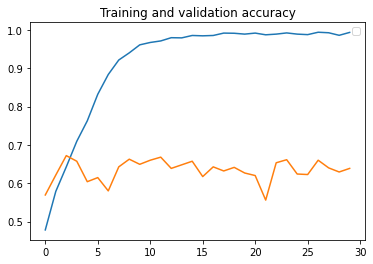

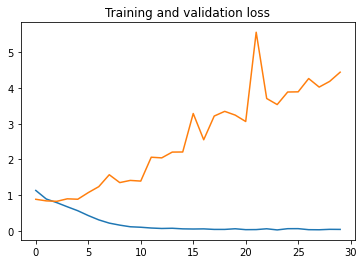

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.legend()
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

As we can see, the 0.3 Drop-Out is not sufficient to avoid overfitting in our model. Let's see the effect of increasing the Drop-Out parameter.

## Model Creation: Drop-Out = 0.7

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout layer with a dropout rate of 0.7
x = layers.Dropout(0.7)(x)
# Create output layer with three nodes and softmax activation
output = layers.Dense(3, activation='softmax')(x)

# Configure and compile the model
model_do_07 = Model(img_input, output)
model_do_07.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

### Training

In [ ]:
# put your code in this cell
history = model_do_07.fit(
      train_generator,
      steps_per_epoch=150,  # 2250 images = batch_size * steps --> 2000 = 20 * 100
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,  # 750 images = batch_size * steps --> 1000 = 20 * 50
      verbose=2)

Epoch 1/30
150/150 - 13s - loss: 1.0648 - acc: 0.4880 - val_loss: 0.9215 - val_acc: 0.5387
Epoch 2/30
150/150 - 12s - loss: 0.8707 - acc: 0.5902 - val_loss: 0.8277 - val_acc: 0.6093
Epoch 3/30
150/150 - 12s - loss: 0.8096 - acc: 0.6329 - val_loss: 0.8661 - val_acc: 0.6333
Epoch 4/30
150/150 - 12s - loss: 0.7620 - acc: 0.6524 - val_loss: 0.8476 - val_acc: 0.5667
Epoch 5/30
150/150 - 12s - loss: 0.7210 - acc: 0.6724 - val_loss: 0.8528 - val_acc: 0.6253
Epoch 6/30
150/150 - 12s - loss: 0.6648 - acc: 0.7164 - val_loss: 0.8091 - val_acc: 0.6747
Epoch 7/30
150/150 - 12s - loss: 0.5939 - acc: 0.7502 - val_loss: 0.8544 - val_acc: 0.6120
Epoch 8/30
150/150 - 12s - loss: 0.5550 - acc: 0.7680 - val_loss: 0.8532 - val_acc: 0.6827
Epoch 9/30
150/150 - 13s - loss: 0.4889 - acc: 0.7938 - val_loss: 1.0930 - val_acc: 0.6613
Epoch 10/30
150/150 - 12s - loss: 0.4414 - acc: 0.8316 - val_loss: 1.0366 - val_acc: 0.6560
Epoch 11/30
150/150 - 12s - loss: 0.3737 - acc: 0.8560 - val_loss: 1.0354 - val_acc: 0.66

### Evaluation of the results

Text(0.5, 1.0, 'Training and validation loss')

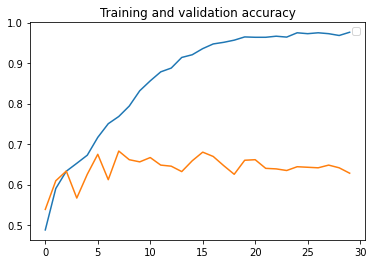

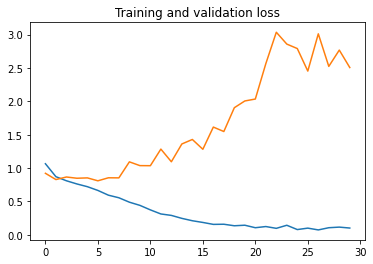

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.legend()
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

As we can see, the increase of the Drop-Out parameter from 0.3 to 0.7 affected the training of the model. In fact, even if the model in the end is still overfitting, the training accuracy grows in a **slower way** compared to before. This is because the model is **trying to better generalise** given that, in each pass, 70% of the units of the Drop-Out Layer are dropped. However, the final performance in the validation metrics is still poor. In the following part, we are going to try another regularisation technique, **Data Augmentation**, in order to reduce the overfitting of our model.

# Model 3: CNN with Data Augmentation

In this part, we are going to explore the concept of **Data Augmentation** and its impact on the performance of our model.

Data Augmentation is a technique that is used to **increase the variability** of the input data in order for the model to **generalise better**. This is done by a number of **random transformations** of our input images, so our model, during training, will **never see the same picture twice**. To do so, we will use the ImageGeneretor function of Keras, that has different arguments to do the various transformations.

For more information about the different arguments, here is the link to the official documentation: https://keras.io/api/preprocessing/image/

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40, #to randomly rotate the image
      width_shift_range=0.2, #ranges within which translate the picture horizontally
      height_shift_range=0.2, #ranges within which translate the picture vertically
      shear_range=0.2, #apply a shearing transformation, to deform the shape of the object skewing it
      zoom_range=0.2, #random zoom of the image
      horizontal_flip=True, #flipping the image horizontally
      fill_mode='nearest') #strategy to fill the newly created pixels that can appear after transforming the image (like width/height shift)

Here we can see an example of how an image was manipulated.

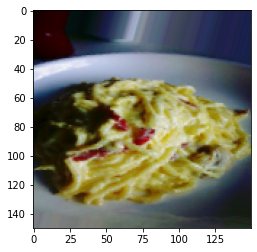

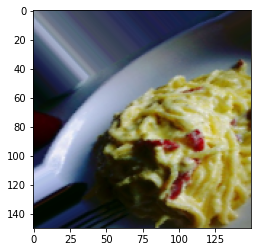

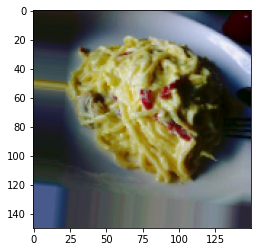

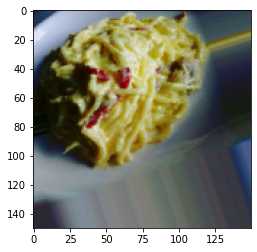

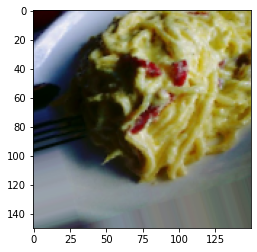

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img_path = os.path.join(train_carbonara_dir, train_carbonara_fnames[5])
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# The .flow() command below generates batches of randomly transformed images
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 5 == 0:
    break

## Data Preprocessing

Here we are going to create the data generator as input of our Neural Network but, in addition to the rescale parameter used to normalise the values of the pixels, we are going to add the various transformations we discussed before. Important to notice that these transformations must be done only on the training data, while our validation data is kept as it is, to understand the performance of the model on "real life" examples.

In [ ]:
# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 15 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=15,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# Flow validation images in batches of 15 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=15,
        class_mode='categorical')

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


## Model Creation

Now we are going to build our model, using the same structure of Model 1, so without using Drop-Out. This is done to evaluate the effect of Drop-Out and Data Augmentation individually. Later on, we will also combine them.

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512 , activation='relu')(x)

# Create output layer with a three nodes and softmax activation
output = layers.Dense(3, activation='softmax')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model_da = Model(img_input, output)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model_da.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

## Training

Now we are going to train our model for 30 epochs.

In [ ]:
history = model_da.fit(
      train_generator,
      steps_per_epoch=150,  # 2250 images = batch_size * steps
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,  # 750 images = batch_size * steps
      verbose=2)

Epoch 1/30
150/150 - 23s - loss: 1.0740 - acc: 0.4693 - val_loss: 0.8873 - val_acc: 0.5693
Epoch 2/30
150/150 - 22s - loss: 0.9427 - acc: 0.5556 - val_loss: 0.8150 - val_acc: 0.6240
Epoch 3/30
150/150 - 22s - loss: 0.8795 - acc: 0.5858 - val_loss: 1.0670 - val_acc: 0.4853
Epoch 4/30
150/150 - 22s - loss: 0.8211 - acc: 0.6244 - val_loss: 0.8583 - val_acc: 0.6000
Epoch 5/30
150/150 - 22s - loss: 0.8045 - acc: 0.6244 - val_loss: 0.7486 - val_acc: 0.6613
Epoch 6/30
150/150 - 22s - loss: 0.7766 - acc: 0.6427 - val_loss: 0.8470 - val_acc: 0.5920
Epoch 7/30
150/150 - 22s - loss: 0.7655 - acc: 0.6471 - val_loss: 0.7723 - val_acc: 0.6360
Epoch 8/30
150/150 - 22s - loss: 0.7388 - acc: 0.6582 - val_loss: 0.8874 - val_acc: 0.6280
Epoch 9/30
150/150 - 22s - loss: 0.7345 - acc: 0.6604 - val_loss: 0.7327 - val_acc: 0.6867
Epoch 10/30
150/150 - 22s - loss: 0.7228 - acc: 0.6782 - val_loss: 0.7142 - val_acc: 0.6853
Epoch 11/30
150/150 - 22s - loss: 0.7162 - acc: 0.6791 - val_loss: 0.8109 - val_acc: 0.66

## Evaluation of the results

Text(0.5, 1.0, 'Training and validation loss')

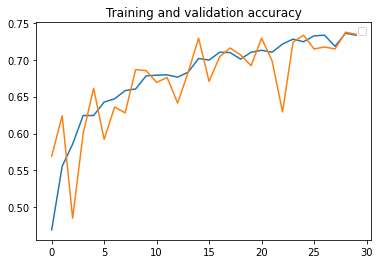

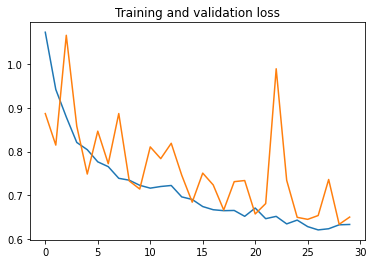

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.legend()
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

As we can see, Data Augmentation actually **prevents the model from overfitting**. In fact, the training and validation accuracy are very similar for all the duration of the training. This is due to the fact that the model, during the training, is not seeing the same image twice, given the transformation made using Data Augmentation. However, as we can see from the graphs, the validation accuracy is very unstable during the training of the model. Let's add Drop-Out regularisation to see is the model improves.

# Model 4: CNN with Data Augmentation and Drop-Out

As we said before, now we are going to see the combined effect of Data Augmentation and Drop-Out on our model.

## Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 15 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=15,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# Flow validation images in batches of 15 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=15,
        class_mode='categorical')

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


## Model Creation

Here we are going to build our model, adding a Drop-Out Layer of 0.5 in order to avoid the model to overfit.

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout layer with a dropout rate of 0.5
x = layers.Dropout(0.5)(x)
# Create output layer with three nodes and softmax activation
output = layers.Dense(3, activation='softmax')(x)

# Configure and compile the model
model_do_da_07 = Model(img_input, output)
model_do_da_07.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

## Training

In [ ]:
history = model_do_da_07.fit(
      train_generator,
      steps_per_epoch=150,  # 2250 images = batch_size * steps
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,  # 750 images = batch_size * steps
      verbose=2)

Epoch 1/30
150/150 - 23s - loss: 1.1475 - acc: 0.4520 - val_loss: 0.9554 - val_acc: 0.5453
Epoch 2/30
150/150 - 22s - loss: 0.9644 - acc: 0.5111 - val_loss: 2.1684 - val_acc: 0.3493
Epoch 3/30
150/150 - 22s - loss: 0.9133 - acc: 0.5600 - val_loss: 0.8149 - val_acc: 0.6467
Epoch 4/30
150/150 - 22s - loss: 0.8700 - acc: 0.5938 - val_loss: 0.7858 - val_acc: 0.6707
Epoch 5/30
150/150 - 22s - loss: 0.8502 - acc: 0.6018 - val_loss: 0.7797 - val_acc: 0.6653
Epoch 6/30
150/150 - 22s - loss: 0.8218 - acc: 0.6213 - val_loss: 0.8224 - val_acc: 0.6560
Epoch 7/30
150/150 - 22s - loss: 0.8024 - acc: 0.6418 - val_loss: 0.7522 - val_acc: 0.6720
Epoch 8/30
150/150 - 22s - loss: 0.7749 - acc: 0.6444 - val_loss: 0.8599 - val_acc: 0.6547
Epoch 9/30
150/150 - 22s - loss: 0.7867 - acc: 0.6440 - val_loss: 0.7611 - val_acc: 0.6800
Epoch 10/30
150/150 - 22s - loss: 0.7646 - acc: 0.6542 - val_loss: 0.7396 - val_acc: 0.6787
Epoch 11/30
150/150 - 22s - loss: 0.7562 - acc: 0.6436 - val_loss: 0.7424 - val_acc: 0.69

## Evaluation of the results

Text(0.5, 1.0, 'Training and validation loss')

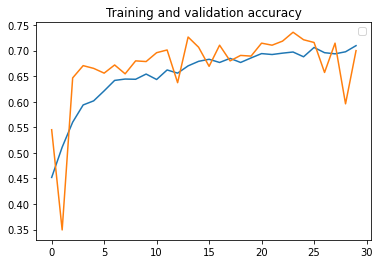

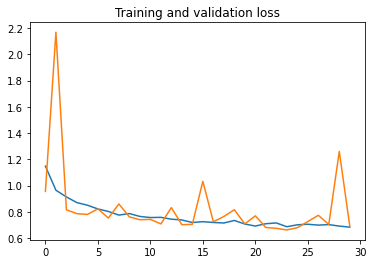

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.legend()
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

As we can see, the Drop-Out regularisation technique helps in both **reduce overfitting** (the training accuracy grows less rapidly than the case with only Data Augmentation) and it also helps **stabilise the validation accuracy**, thanks to, as we said before, the effect of dropping 70% of the neurons of the Drop-Out Layer, spreading the learning to as many neurons as possible.

# Model 5: Transfer Learning using Inception V3

In this final part, we will apply **Transfer Learning**, using the model **Inception V3** developed by Google, and trained on the ImageNet database, a large dataset of images.

Transfer Learning consists in the utilisation of an **already trained** Neural Network, usually trained with a huge amount of data, in order to extract the features of images and reuse them inside our model. Technically, we are going to **extract the the already trained layers** of the Inception V3 model until the "Mixed-7" Layer. Then we are going to add on top **our own classification layer** in order to do the final image classification.

## Importing the Inception V3 Model

In [ ]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-02-03 15:12:35--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 2404:6800:4008:c01::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  83.1MB/s    in 1.0s    

2021-02-03 15:12:36 (83.1 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



With these lines of code, we are importing the model and define the input size of the images and the initial weights. In addition, we are setting the include_top argument equal to False in order to not include the classification layer of the imported model.

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights=None) #Include top = False means to not include the classification layer (we will put it manually)
pre_trained_model.load_weights(local_weights_file)

Here we are going to **freeze all the layers** of the imported model, in order, in the first phase, to train only the weights of the fully connected classification layers, in order to adapt these weights to our own specific data.

In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False #freeze all the layers

## Creating the final Model stacking our Classification Layer on top of the imported Model

In these following cells, we are going to take all the layers of the Inception V3 until the "Mixed-7" layer, and then add on top our classification layers using a Drop-Out layer of 40%, to let our Network to learn the specificities of our food images.

In [ ]:
#Take all the layers until mixed7
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 7, 7, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.4
x = layers.Dropout(0.4)(x)
# Add a final softmax layer for classification
x = layers.Dense(3, activation='softmax')(x)

# Configure and compile the model
model_tl = Model(pre_trained_model.input, x)
model_tl.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

## Data Preprocessing

Here we are going to prepare the data applying Data Augmentation:

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=15,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=15,
        class_mode='categorical')

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


Here we can see the structure of our Neural Network, with all the different layers and parameters. Very interesting to notice that, among 47 Millions parameters, only 8 Millions are trainable, because we left unfrozen only the classification layers' weights.

In [ ]:
model_tl.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_103 (Conv2D)             (None, 74, 74, 32)   864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_103[0][0]                 
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

## Training of Classification Layer

Here we are going to train our model for 30 epochs.

In [ ]:
history = model_tl.fit(
      train_generator,
      steps_per_epoch=150,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/30
150/150 - 34s - loss: 1.1060 - acc: 0.7978 - val_loss: 8.6307 - val_acc: 0.5987
Epoch 2/30
150/150 - 28s - loss: 0.4482 - acc: 0.8702 - val_loss: 4.3098 - val_acc: 0.8293
Epoch 3/30
150/150 - 28s - loss: 0.3745 - acc: 0.8933 - val_loss: 0.5551 - val_acc: 0.9053
Epoch 4/30
150/150 - 28s - loss: 0.3008 - acc: 0.9147 - val_loss: 0.2773 - val_acc: 0.9347
Epoch 5/30
150/150 - 28s - loss: 0.2957 - acc: 0.9191 - val_loss: 0.3257 - val_acc: 0.9200
Epoch 6/30
150/150 - 28s - loss: 0.3094 - acc: 0.9120 - val_loss: 0.3050 - val_acc: 0.9213
Epoch 7/30
150/150 - 28s - loss: 0.2562 - acc: 0.9213 - val_loss: 0.3628 - val_acc: 0.9200
Epoch 8/30
150/150 - 28s - loss: 0.2485 - acc: 0.9373 - val_loss: 0.3246 - val_acc: 0.9173
Epoch 9/30
150/150 - 28s - loss: 0.2317 - acc: 0.9271 - val_loss: 0.4049 - val_acc: 0.9080
Epoch 10/30
150/150 - 28s - loss: 0.2224 - acc: 0.9382 - val_loss: 0.4031 - val_acc: 0.9147
Epoch 11/30
150/150 - 28s - loss: 0.2151 - acc: 0.9418 - val_loss: 0.4271 - val_acc: 0.93

We can see that we achieved a validation accuracy of 90%. Now that the weights of the classification layer are more or less adapted to our data, we could try to **unfreeze some layers** of the imported model to try to customise them as well to our specific data. This is called model **"fine-tuning"**. This operation must be attempted only after having trained the top level classifier with the Convolution Layers frozen, otherwise the magnitude of the gradient update would be too large. In addition, it's advisable to **fine-tune only the top layers** of our imported model, that contains **features more specific** to the data we have, while the initial layers of the CNN contains more generic features that generalise to all types of images.

We are also going to **lower the learning rate** of the optimiser, in order to avoid to disrupt too much the values of the weights of the imported model.

## Unfreezing some Layers and Fine Tuning the Convolution Layers

In [ ]:
unfreeze = False

# Unfreeze all models after "mixed6"
for layer in pre_trained_model.layers:
  if unfreeze:
    layer.trainable = True
  if layer.name == 'mixed6':
    unfreeze = True

#Decrease the learning rate
model_tl.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['acc'])

In [ ]:
history = model_tl.fit(
      train_generator,
      steps_per_epoch=150,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/30
150/150 - 33s - loss: 0.0854 - acc: 0.9742 - val_loss: 0.5868 - val_acc: 0.9133
Epoch 2/30
150/150 - 27s - loss: 0.0817 - acc: 0.9782 - val_loss: 0.5312 - val_acc: 0.9227
Epoch 3/30
150/150 - 27s - loss: 0.1006 - acc: 0.9747 - val_loss: 0.5347 - val_acc: 0.9200
Epoch 4/30
150/150 - 27s - loss: 0.1037 - acc: 0.9769 - val_loss: 0.5105 - val_acc: 0.9213
Epoch 5/30
150/150 - 27s - loss: 0.0966 - acc: 0.9782 - val_loss: 0.5273 - val_acc: 0.9187
Epoch 6/30
150/150 - 27s - loss: 0.0709 - acc: 0.9782 - val_loss: 0.5215 - val_acc: 0.9187
Epoch 7/30
150/150 - 27s - loss: 0.0554 - acc: 0.9867 - val_loss: 0.5472 - val_acc: 0.9240
Epoch 8/30
150/150 - 28s - loss: 0.0652 - acc: 0.9800 - val_loss: 0.5896 - val_acc: 0.9227
Epoch 9/30
150/150 - 28s - loss: 0.0952 - acc: 0.9782 - val_loss: 0.5883 - val_acc: 0.9227
Epoch 10/30
150/150 - 28s - loss: 0.0587 - acc: 0.9822 - val_loss: 0.5848 - val_acc: 0.9253
Epoch 11/30
150/150 - 28s - loss: 0.0526 - acc: 0.9804 - val_loss: 0.5524 - val_acc: 0.92

## Evaluation of the results

Text(0.5, 1.0, 'Training and validation loss')

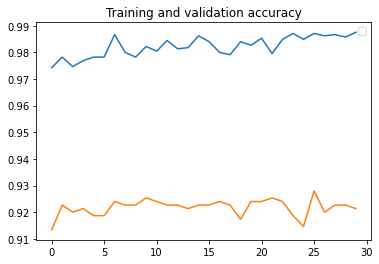

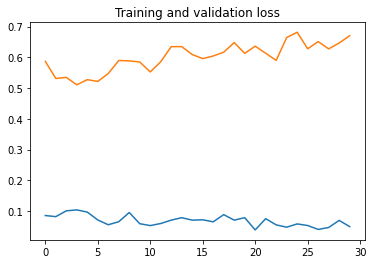

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.legend()
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

After the "fine-tuning" of the Convolutional Layers, we can see that our model reach a final validation accuracy of 92%. Not bad at all!

# Predict Image Class

In this last part, we are going to predict the image class using the last model created. To do so, we are going to load three images of Pizza, Risotto and Carbonara that I cooked recently and see the ability of the model to generalise to unseen data.

In [ ]:
%pwd

'/root/tensorflow_datasets/downloads/extracted/TAR_GZ.data.vision.ee.ethz.ch_cvl_food-101ySzkoooKID8NlHHVljthH7dFjfXyynkttKL0IdIi3f4.tar.gz/food-101/images/val'

In [ ]:
%cd /
%ls

/
bin/      dev/          IMG_5299.JPG  lib64/  proc/  srv/                tmp/
boot/     etc/          IMG_5994.JPG  media/  root/  swift/              tools/
content/  home/         lib/          mnt/    run/   sys/                usr/
datalab/  IMG_4719.JPG  lib32/        opt/    sbin/  tensorflow-1.15.2/  var/


## Pizza

In the folliwing cells we are going to load the image, show it and prepare it to be used by our CNN.

In [ ]:
# Loading image with the Keras API
from keras.preprocessing.image import load_img
# load the image
img = load_img('/IMG_4719.JPG')

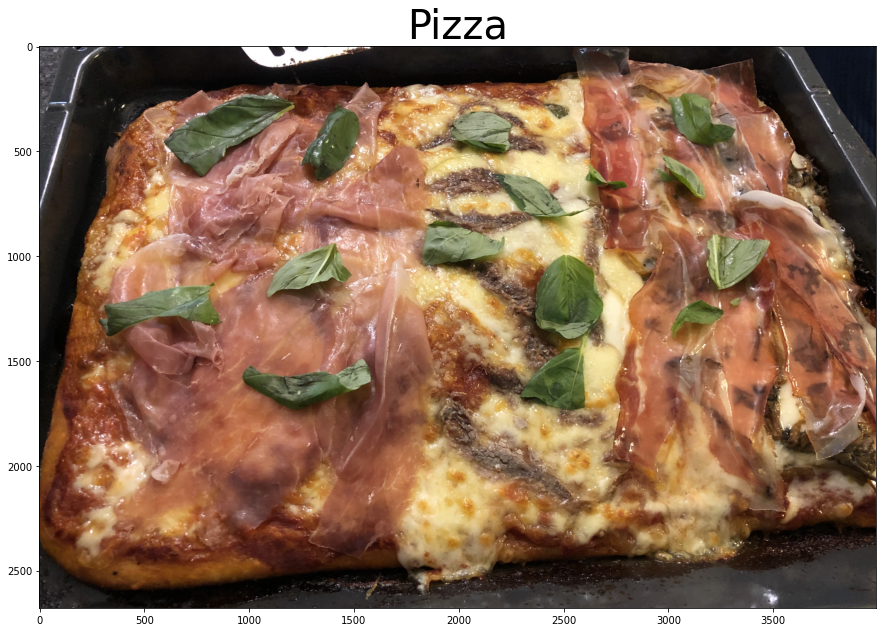

In [ ]:
# Plot the originsl image
fig = plt.figure(figsize=(15,15))
plt.imshow(img)
plt.title("Pizza", size = 40)
plt.show()

In [ ]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
%matplotlib inline

# Get the image size
o_h, o_w = img.size
print('Original size:', o_h, 'x', o_w)

# We'll resize this so it's 150 x 150
target_size = (150,150)
new_img = img.resize(target_size)
n_h, n_w = new_img.size
print('New size:', n_h, 'x', n_w)

Original size: 3993 x 2678
New size: 150 x 150


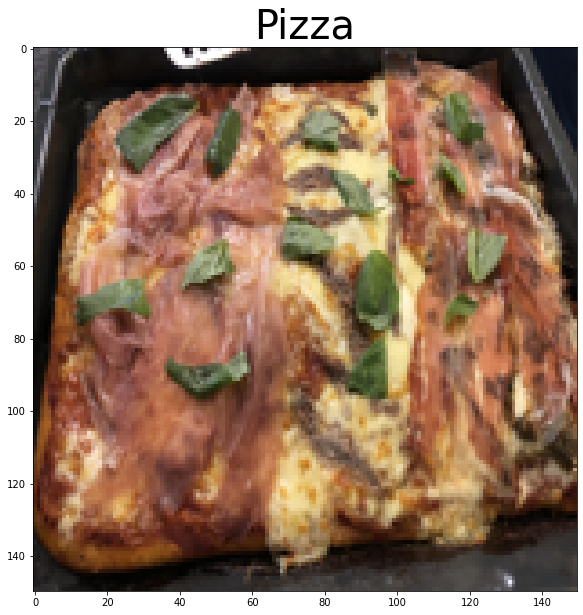

In [ ]:
# Plot the resized image
fig = plt.figure(figsize=(10,10))
plt.imshow(new_img)
plt.title("Pizza", size = 40)
plt.show()

In [ ]:
# Prepare the image to be input in the CNN
from tensorflow.keras.preprocessing.image import img_to_array, load_img
x = img_to_array(new_img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

Now that we have our image ready, we are going to predict the probabilities to belong to each class and show the label of the corresponding maximum probability.

In [ ]:
img_1_pred = model_tl.predict(x)

In [ ]:
img_1_pred #almost 100% of prob for label 1 (second index of the array)

array([[1.8162946e-10, 1.0000000e+00, 1.1558788e-08]], dtype=float32)

In [ ]:
val = img_1_pred.argmax()

In [ ]:
label_dict = train_generator.class_indices

In [ ]:
label_dict

{'train_carbonara': 0, 'train_pizza': 1, 'train_risotto': 2}

In [ ]:
list(label_dict.keys())[list(label_dict.values()).index(val)]

'train_pizza'

Our model correctly classifies the image as Pizza.

## Carbonara

In the folliwing cells we are going to load the image, show it and prepare it to be used by our CNN.

In [ ]:
# Loading image with the Keras API
from keras.preprocessing.image import load_img
# load the image
img = load_img('/IMG_5994.JPG')

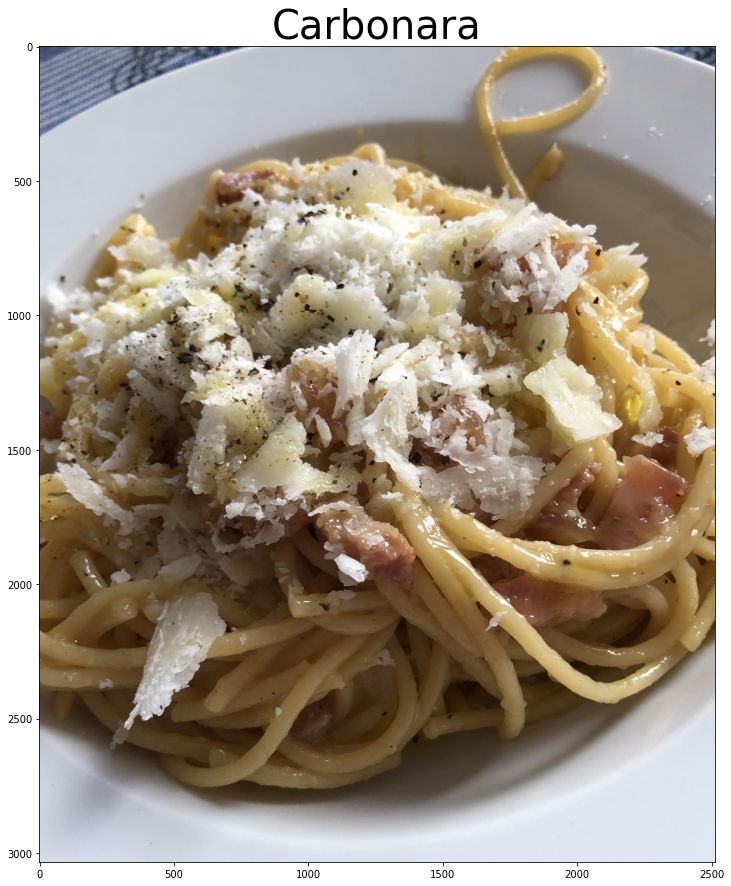

In [ ]:
# Plot the original image
fig = plt.figure(figsize=(15,15))
plt.imshow(img)
plt.title("Carbonara", size = 40)
plt.show()

In [ ]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
%matplotlib inline

# Get the image size
o_h, o_w = img.size
print('Original size:', o_h, 'x', o_w)

# We'll resize this so it's 150 x 150
target_size = (150,150)
new_img = img.resize(target_size)
n_h, n_w = new_img.size
print('New size:', n_h, 'x', n_w)

Original size: 2512 x 3033
New size: 150 x 150


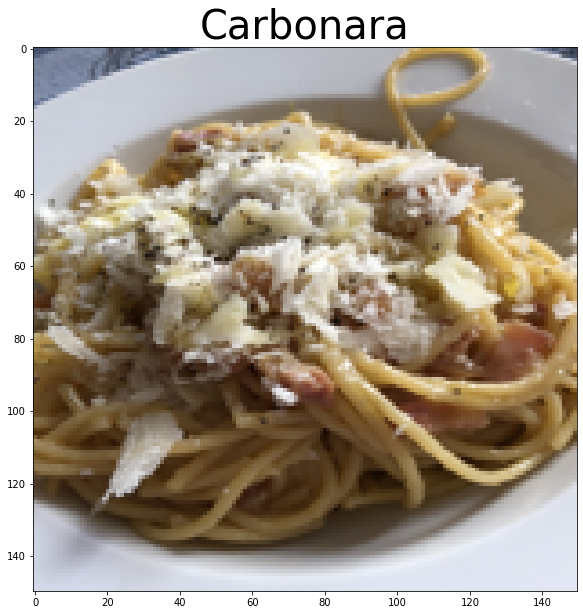

In [ ]:
# Plot the resized image
fig = plt.figure(figsize=(10,10))
plt.imshow(new_img)
plt.title("Carbonara", size = 40)
plt.show()

In [ ]:
# Prepare the image to be input in the CNN
from tensorflow.keras.preprocessing.image import img_to_array, load_img
x = img_to_array(new_img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

Now that we have our image ready, we are going to predict the probabilities to belong to each class and show the label of the corresponding maximum probability.

In [ ]:
img_2_pred = model_tl.predict(x)

In [ ]:
img_2_pred #100% of prob for label 0 (first index of the array)

array([[1.0000000e+00, 0.0000000e+00, 1.0458046e-26]], dtype=float32)

In [ ]:
val = img_2_pred.argmax()

In [ ]:
label_dict = train_generator.class_indices

In [ ]:
label_dict

{'train_carbonara': 0, 'train_pizza': 1, 'train_risotto': 2}

In [ ]:
list(label_dict.keys())[list(label_dict.values()).index(val)]

'train_carbonara'

## Risotto

In the folliwing cells we are going to load the image, show it and prepare it to be used by our CNN.

In [ ]:
# Loading image with the Keras API
from keras.preprocessing.image import load_img
# load the image
img = load_img('/IMG_5299.JPG')

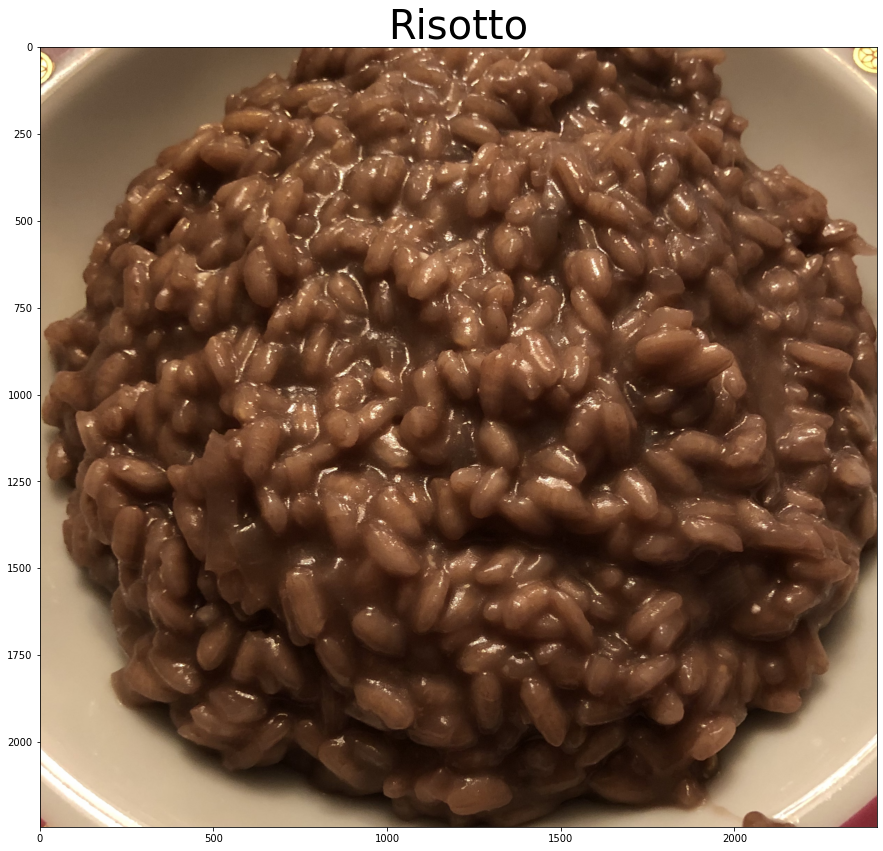

In [ ]:
# Plot the original image
fig = plt.figure(figsize=(15,15))
plt.imshow(img)
plt.title("Risotto", size = 40)
plt.show()

In [ ]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
%matplotlib inline

# Get the image size
o_h, o_w = img.size
print('Original size:', o_h, 'x', o_w)

# We'll resize this so it's 150 x 150
target_size = (150,150)
new_img = img.resize(target_size)
n_h, n_w = new_img.size
print('New size:', n_h, 'x', n_w)

Original size: 2410 x 2245
New size: 150 x 150


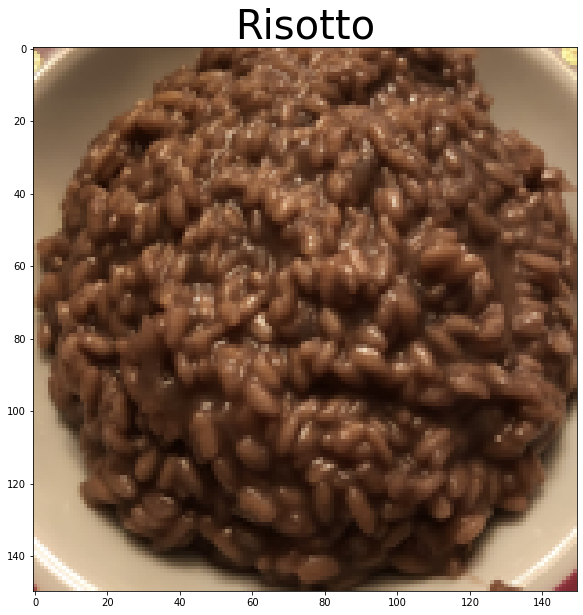

In [ ]:
# Plot the resized image
fig = plt.figure(figsize=(10,10))
plt.imshow(new_img)
plt.title("Risotto", size = 40)
plt.show()

In [ ]:
# Prepare the image to be input in the CNN
from tensorflow.keras.preprocessing.image import img_to_array, load_img
x = img_to_array(new_img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

Now that we have our image ready, we are going to predict the probabilities to belong to each class and show the label of the corresponding maximum probability.

In [ ]:
img_3_pred = model_tl.predict(x)

In [ ]:
img_3_pred #almost 100% of prob for label 2 (third index of the array)

array([[0., 0., 1.]], dtype=float32)

In [ ]:
val = img_3_pred.argmax()

In [ ]:
label_dict = train_generator.class_indices

In [ ]:
label_dict

{'train_carbonara': 0, 'train_pizza': 1, 'train_risotto': 2}

In [ ]:
list(label_dict.keys())[list(label_dict.values()).index(val)]

'train_risotto'

# Conclusions

Now our exercise arrives at the end. There are a few points I would like to highlight as a sort of lesson learned from this project:

   * Convolutional Neural Networks are extremely powerful in the Image Classification task, thanks to the ability to scan the whole image and learn patterns and features from the image
   * In order to use CNN (and any other type od Deep Learning algorithm), is very important to have a lot of training data; in fact, we can see that our first model performance is not great
   * In order to surpass this limitation, it is better to use an already trained model and fine-tune it with your specific data (Transfer Learning)
   * Data Augmentation and Drop-Out are effective ways to apply regularisation and prevent overfitting in CNN


I hope you liked this exercise as much as I liked doing it. And now, if you are a bit hungry after having seen all these food images, I give you my personal recipes of the three food mentioned, so you can prepare them at home!

## Carbonara Recipe

Ingredients for 4 people:

   * 400g Spaghetti (other types of pasta are fine as well)
   * 300g Guanciale (or Pancetta if you don't find it)
   * 200g Formaggio Pecorino (or Parmigiano if you don't find it)
   * 3 full eggs + 3 egg yolks
   * Pepper

In a pot put the water to boil; when it boils put the coarse salt and the Pasta; check on the pasta packaging for the cooking time.

In the meantime, put in another non-stick pan the guanciale cutted in little pieces; cook the guanciale without oil because it releases its own fat; cook it until it is well crisp (but pay attention not to burn it) and then turn off the fire.

In a soup plate put the eggs, half of the cheese and some Pepper (the quantity of Pepper depends on your tastes) and mix it until you have a nice cream.

When the pasta is cooked, remove it from the water and put it into the pan with the guanciale and turn on the fire again for a couple of minutes, in order for the pasta to mix well with the fat.

Then, turn off the fire and wait one/two minutes before putting the egg cream. This is very important, because if you put the cream with the fire on, the egg will cook, producing a omelette-effect that is to avoid for carbonara. Then, put the egg cream and mix it immediately with the pasta, in order to create a wonderful pasta/guanciale/egg mix.

Serve on a plate with the rest of the cheese and some additional pepper.

## Risotto Recipe

Ingredients for 4 people:

   * 350g Rice for Risotto
   * 1 Bottle of Red Wine
   * 1 big Onion
   * 2L of Vegetable Broth
   * Olive Oil
   * 150g Parmigiano

In a pot put the water to boil and add 4 broth cubes (usually is one cube every 0.5L, but you can check that on the packaging). In alternative, you can make the broth directly boiling some vegetables (carrots, onions etc) in the water, adding some salt.

Cut the onion in very little pieces. In another pot, put some Olive Oil and turn on the flame, leave it to warm a couple of minutes and then put the onion to cook for 3/4 minutes, until it goldens a bit.

In the meantime, warm in a microonde oven (or another pot) the red wine in order for it not to be cold.

Afterwards, put the rice in the pot with the onion and mix it for one minute, in order to toast it a little bit. Then, add little by little the red wine until you put half of the bottle inside the pot. Little by little means that you need to start putting the liquid until the rice is well soaked with it, but not drowned, and wait for the wine to evaporate before continuing adding it again. The rice during the cooking must never be too much soaked, but neither too much dry. 

After half of the bottle is inside the rice, continue the cooking by adding the broth. The total cooking time should be around 18/20 minutes, according to your tastes in terms of rice hardness. Around the end of the cooking (minute 14/15) put the rest of the wine, again little by little. If the rice needs further cooking, go back to the broth until it is ready.

When the cooking is finished, turn the flame off and put half of the cheese. Mix it with the risotto until it is melted. Serve the risotto in a plate adding some other cheese on top.




## Pizza Recipe

Ingredients for 4 people:

   * 500g Manitoba Flour 0 (or a similar "strong" flour)
   * 400ml Water
   * 10g Salt
   * 20g Olive Oil
   * 4g of slow leavening yeast (or 12g of fresh brewer's yeast)
   * 0.5L of Tomato Sauce
   * 750g Mozzarella
   * other toppings you like

In order to prepare the dough, mix the flour with the yeast and then add 3/4 of the water. Mix it very well with a fork in a recepient and add the remaining water until the dough is compact. Do not worry if it is very soft and smooth. Then add the salt and incorporate it in the dough. Finally add the oil and incorporate it as well, merging it in the dough. In the end you should have a soft but elastic dough.

Then, put the dough on a table, previously covered with some flour, and fold it on itself in order to create some bubbles in the inside (it will help to have a soft pizza). 

Repeat the folding for 4/5 times.

Then put the dough in an ample recipient and cover it with plastic film and put it into the fridge for 24h.

After 24h, the dough should have doubled it size. Remove it from the recepient and put it on a table, previously covered with some flour. Then, very carefully, stretch the dough using only the fingers, in order not to break the bubbles created during the growing. Stretch it until you arrive at a rectangular shape of about 40X30 cm, approximately the dimension of the baking tray. 

In the meantime, turn on the oven at static mode, 220C degrees temperature.

Afterwards, remove the tray from the oven put some oil on it and spread the oil on the whole surface. Then, place the stretched dough on the tray and leave it for 30 mins (approximately the time the oven takes to warm).

In the meantime, cut the mozzarella in little pieces and let it lose its water. You can use a colander.

When the oven is at the right temperature, put the tomato sauce on the whole surface of the dough and put the tray in the lower part of the oven. Let it cook for 18/20 minutes. 

Then, take the pizza out of the oven and cover it with the mozzarella and the other ingredients you like. Some suggestions: Ham and mushrooms, Prosciutto Crudo, Blue Cheese, Olives and Anchovies, different types of cheese. You can also divide your pizza in different regions and put different ingredients on it (as I did in the above image).

Then, put the pizza back in the oven in the upper part of it, for another 7/8 minutes, in order for the cheese to melt properly.

Then take the pizza out and enjoy it!